# CS 240 EXPLORATORY DATA ANALYSIS Spring 2019 Assignment 3

In [2]:
#common imports
import numpy as np
from datascience import *

#To plot figures
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plots
plt.style.use('fivethirtyeight')

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.simplefilter('ignore')

## Testing Hypotheses

## 1. Catching Cheaters

Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins $\$$9 from the casino if it comes up heads and loses $\$$10 if it comes up tails.

__________

**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money? Do not directly write the probability of making money. Simulate it (playing twice) 10,000 times and calculate the probability based on the simulation result.

In [4]:
coin = make_array('HH','HT','TH','TT') #playing twice means 4 outcomes
heads = make_array()
num_repetitions = 10000
for i in np.arange(num_repetitions):
    outcomes = np.random.choice(coin, 1)
    num_heads = np.count_nonzero(outcomes == 'HH') #making money: 'HH'
    heads = np.append(heads,num_heads)
p_winning_after_two_flips = sum(heads)/num_repetitions
p_winning_after_two_flips

0.2476

______________

A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, **you think that their chance of winning is higher than the normal chance of winning.**

You decide to test your hunch using the outcomes of the 20 games you observed.


**Question 2.** Define the null hypothesis and alternative hypothesis for this investigation. 

**Null hypothesis:** 13 wins of 20 times is due to chance the customer was not cheating.

**Alternative hypothesis:** Their chance of winning is higher than the normal chance of winning. 13 wins of 20 times is not due to chance the customer was cheating. 

_________

<div class="hide">\pagebreak</div>
Suppose you decide to use the number of wins as your test statistic.

**Question 3.** Write a function called `simulate` that generates exactly one simulation of your test statistic under the Null Hypothesis.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption of Null Hypothesis.

*Hint*: You may find the textbook [section](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models#predicting-the-statistic-under-the-model) on the `sample_proportions` function to be useful.

In [5]:
def simulate():
    coin_outcomes = make_array(0.25,0.75) #probability of getting HH is 0.25, not getting is 0.75
    return (20*sample_proportions(20,coin_outcomes).item(0)) #the actual percentage of the sample that a customer is winning
simulate()

4.0

____________

**Question 4.** Using 10,000 trials, generate simulated values of the number of wins in 20 games. Assign `test_statistics_under_null` to an array that stores the result of each of these trials.

*Hint*: Feel free to use the function you defined in Question 3.

In [6]:
repetitions = 10000
test_statistics_under_null = make_array()
for i in np.arange(repetitions): #Using 10,000 trials we are generating simulated values of the number of wins in 20 games
    test_statistics_under_null = np.append(test_statistics_under_null,simulate())
test_statistics_under_null

array([7., 8., 4., ..., 3., 2., 1.])

_________________________

**Question 5.** Using the results from Question 4, generate a histogram of the empirical distribution of the number of wins in 20 games.

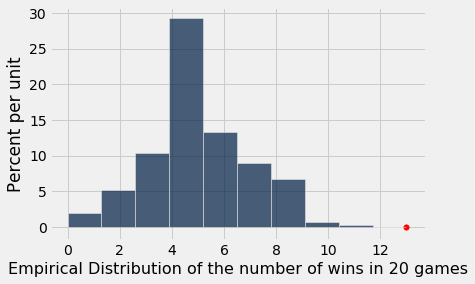

In [7]:
observed_value = 13 #A certain customer plays the game 20 times and wins 13 of the bets.
Table().with_column('Empirical Distribution of the number of wins in 20 games',test_statistics_under_null).hist()
plots.scatter(observed_value,0,color = 'red',s = 30); 

________________

<div class="hide">\pagebreak</div>

**Question 6.** Compute an empirical P-value for this test.

*Hint:* Which values of our test statistic are in the direction of the alternative hypothesis?

In [8]:
observed_value = 13 #A certain customer plays the game 20 times and wins 13 of the bets.
p_value = np.sum(test_statistics_under_null >= observed_value)/repetitions
p_value #empirical P-value for this test so we can conlude whhic hypothesis it is.

0.0001

________________

**Question 7.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

P-value is very smaller than the P-value cutoff of 1% which means we reject the null hypothesis and accept alternative, we can say that the customer was cheating as his chance of winning 13 is not possible out of 20 games.

__________________________

**Practice Question.** Suppose you run this test for 400 different customers after observing each customer play 20 games.  When you reject the null hypothesis for a customer, you accuse that customer of cheating.  If no customers were actually cheating, can we compute how many we will incorrectly accuse of cheating? If so, what is the number? Explain your answer. Assume a 1% P-value cutoff.

____________

## Confidence Intervals

## 2. Plot the Vote

Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters*, or the proportion of the votes that each candidate received from the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [9]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows
print(num_votes)
votes

1000


vote
C
C
C
C
C
C
C
C
C
C


______________

**Question 8.** Below, complete the given  code that will use bootstrapped samples from `votes` to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**. Make sure that you understand what's going on here.

In [10]:
def proportions_in_resamples():
    prop_c = make_array()
    for i in np.arange(5000):
        bootstrap = votes.sample()
        single_proportion = np.count_nonzero(bootstrap.column(0) == 'C') / len(bootstrap.column(0))
        prop_c = np.append(prop_c, single_proportion)
    return prop_c

In the following cell, we run the function you just defined, `proportions_in_resamples`, and create a histogram of the calculated statistic for the 5,000 bootstraps. Make sure that it seems reasonable

[0.473 0.445 0.467 ... 0.455 0.47  0.473]


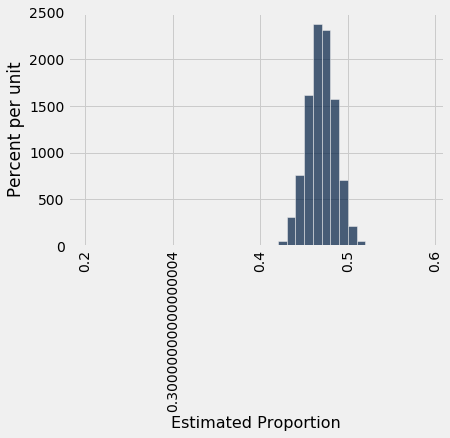

In [11]:
sampled_proportions = proportions_in_resamples()
print(sampled_proportions)
Table().with_column('Estimated Proportion', sampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

______________

**Question 9.** Using the array `sampled_proportions`, find 95% confidence interval. (Compute the lower and upper ends of the interval, named `c_lower_bound` and `c_upper_bound`, respectively.)

In [12]:
c_lower_bound = percentile(2.5,sampled_proportions)
c_upper_bound = percentile(97.5,sampled_proportions)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.438000, 0.501000]


________

**Question 10.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use CI's to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples. Finally calculate 80% confidence interval.

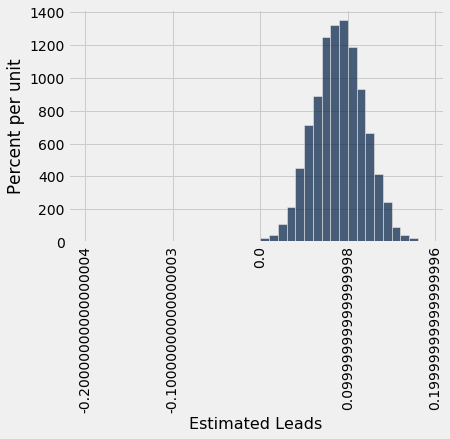

In [13]:
def leads_in_resamples():
    leads = make_array()
    for i in np.arange(5000):
        bootstrap = votes.sample()
        single_lead = (np.count_nonzero(bootstrap.column(0) == 'C') - np.count_nonzero(bootstrap.column(0) == 'T'))/len(bootstrap.column(0))
        leads = np.append(leads, single_lead)    
    return leads

sampled_leads = leads_in_resamples()
Table().with_column("Estimated Leads",sampled_leads).hist(bins = np.arange(-0.2,0.2,0.01))

In [14]:
diff_lower_bound = percentile(10.0,sampled_leads)
diff_upper_bound = percentile(90.0,sampled_leads)
print("Bootstrapped 80% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 80% confidence interval for Candidate C's true lead over Candidate T: [0.052000, 0.127000]
